## Pandas Review


imports the *pandas* API and prints the API version:

In [24]:
from __future__ import print_function

import pandas as pd
pd.__version__

'0.22.0'

In [25]:
import pandas as pd
pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

In [26]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

pd.DataFrame({ 'City name': city_names, 'Population': population })

City name  Population
0  San Francisco      852469
1       San Jose     1015785
2     Sacramento      485199

In [27]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.000000    790.000000    282.000000       2.566375   
50%        434.000000   1167.000000    409.000000       3.544600   
75%        648.250000   1721.000000    605.250000       4.767000   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        17000.000000  
mean        207300.912353  
std         115983.764387  
min          14999.000000  
25%         119400.000000  
50%         180400.000000  
75%         265000.000000  
max         500001.000000

In [28]:
california_housing_dataframe.head(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   
5    -114.58     33.63                29.0       1387.0           236.0   
6    -114.58     33.61                25.0       2907.0           680.0   
7    -114.59     34.83                41.0        812.0           168.0   
8    -114.59     33.61                34.0       4789.0          1175.0   
9    -114.60     34.83                46.0       1497.0           309.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  
5       671.0       239.0         3.3438             74000.0  
6      1841.0       633.0         2.6768             82400.0  
7       375.0       158.0         1.7083             48500.0  
8      3134.0      1056.0         2.1782             58400.0  
9       787.0       271.0         2.1908             48100.0

In [29]:
california_housing_dataframe.shape

(17000, 9)

Another powerful feature of *pandas* is graphing. For example, `DataFrame.hist` lets you quickly study the distribution of values in a column:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b37ecc0>]],
      dtype=object)

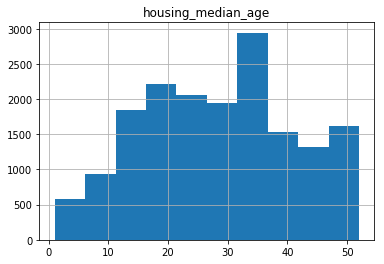

In [30]:
california_housing_dataframe.hist('housing_median_age')

## Accessing Data

You can access `DataFrame` data using familiar Python dict/list operations:

In [31]:
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
print(type(cities['City name']))
cities['City name']

<class 'pandas.core.series.Series'>


0    San Francisco
1         San Jose
2       Sacramento
Name: City name, dtype: object

In [32]:
print(type(cities['City name'][1]))
cities['City name'][1]

<class 'str'>


'San Jose'

In [33]:
print(type(cities[0:2]))
cities[0:2]

<class 'pandas.core.frame.DataFrame'>


City name  Population
0  San Francisco      852469
1       San Jose     1015785

## Manipulating Data

You may apply Python's basic arithmetic operations to `Series`. For example:

In [34]:
population / 1000.

0     852.469
1    1015.785
2     485.199
dtype: float64

In [35]:
import numpy as np

np.log(population)

0    13.655892
1    13.831172
2    13.092314
dtype: float64

In [36]:
population.apply(lambda val: val > 1000000)

0    False
1     True
2    False
dtype: bool


Modifying `DataFrames` is also straightforward. For example, the following code adds two `Series` to an existing `DataFrame`:

In [15]:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities

City name  Population  Area square miles  Population density
0  San Francisco      852469              46.87        18187.945381
1       San Jose     1015785             176.53         5754.177760
2     Sacramento      485199              97.92         4955.055147

## Exercise #1

Modify the `cities` table by adding a new boolean column that is True if and only if *both* of the following are True:

  * The city is named after a saint.
  * The city has an area greater than 50 square miles.

**Note:** Boolean `Series` are combined using the bitwise, rather than the traditional boolean, operators. For example, when performing *logical and*, use `&` instead of `and`.

**Hint:** "San" in Spanish means "saint."

In [16]:
cities['Is wide and has saint name'] = (cities['Area square miles'] > 50) & cities['City name'].apply(lambda name: name.startswith('San'))
cities

City name  Population  Area square miles  Population density  \
0  San Francisco      852469              46.87        18187.945381   
1       San Jose     1015785             176.53         5754.177760   
2     Sacramento      485199              97.92         4955.055147   

   Is wide and has saint name  
0                       False  
1                        True  
2                       False

## Indexes
Both `Series` and `DataFrame` objects also define an `index` property that assigns an identifier value to each `Series` item or `DataFrame` row. 

By default, at construction, *pandas* assigns index values that reflect the ordering of the source data. Once created, the index values are stable; that is, they do not change when data is reordered.

In [17]:
city_names.index

RangeIndex(start=0, stop=3, step=1)

In [18]:
cities.index

RangeIndex(start=0, stop=3, step=1)

Call `DataFrame.reindex` to manually reorder the rows. For example, the following has the same effect as sorting by city name:

In [19]:
cities.reindex([2, 0, 1])

City name  Population  Area square miles  Population density  \
2     Sacramento      485199              97.92         4955.055147   
0  San Francisco      852469              46.87        18187.945381   
1       San Jose     1015785             176.53         5754.177760   

   Is wide and has saint name  
2                       False  
0                       False  
1                        True

Reindexing is a great way to shuffle (randomize) a `DataFrame`. In the example below, we take the index, which is array-like, and pass it to NumPy's `random.permutation` function, which shuffles its values in place. Calling `reindex` with this shuffled array causes the `DataFrame` rows to be shuffled in the same way.
Try running the following cell multiple times!

In [23]:
cities.reindex(np.random.permutation(cities.index))

City name  Population  Area square miles  Population density  \
0  San Francisco      852469              46.87        18187.945381   
1       San Jose     1015785             176.53         5754.177760   
2     Sacramento      485199              97.92         4955.055147   

   Is wide and has saint name  
0                       False  
1                        True  
2                       False

For more information, see the [Index documentation](http://pandas.pydata.org/pandas-docs/stable/indexing.html#index-objects).

## Exercise #2

The `reindex` method allows index values that are not in the original `DataFrame`'s index values. Try it and see what happens if you use such values! Why do you think this is allowed?

In [21]:
cities.reindex([0, 4, 5, 2])

City name  Population  Area square miles  Population density  \
0  San Francisco    852469.0              46.87        18187.945381   
4            NaN         NaN                NaN                 NaN   
5            NaN         NaN                NaN                 NaN   
2     Sacramento    485199.0              97.92         4955.055147   

  Is wide and has saint name  
0                      False  
4                        NaN  
5                        NaN  
2                      False